In [139]:
# Libraries used
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import pickle


## read data

In [71]:
# check current Directory
import os
os.getcwd()

'C:\\Users\\tanch\\OneDrive\\Documents\\Kaggle\\digit-recognizer\\dataset'

In [72]:
# set directory to the folder containing the dataset
os.chdir('C:\\Users\\tanch\\OneDrive\\Documents\\Kaggle\\digit-recognizer\\dataset')

In [73]:
# read the csv as data frame
total_training_set = pd.read_csv('train.csv')
total_test_set = pd.read_csv('test.csv')

## Basic data exploration

In [74]:
# first column is the labels
total_training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
total_test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# split predictors from labels 
y_train_full = total_training_set['label']
X_train_full = total_training_set.drop(['label'],axis=1)

In [77]:
print('Training set has {} images with {} pixels.'.format(X_train_full.shape[0],X_train_full.shape[1]))
print('Test set has {} images with {} pixels.'.format(total_test_set.shape[0],total_test_set.shape[1]))

Training set has 42000 images with 784 pixels.
Test set has 28000 images with 784 pixels.


Row 0 is number 1.


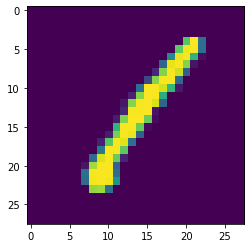

In [78]:
# visualise a row to check validity
row = 0
print('Row {} is number {}.'.format(row,y_train_full[row]))
                                 # reshaped each row to 28 x 28 matrix
plt.imshow(X_train_full.values.reshape((42000,28,28))[row])

Row 34 is number 2.


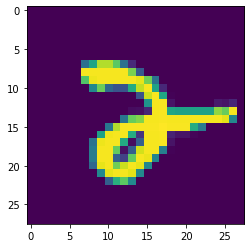

In [79]:
# visualise a row to check validity
row = 34
print('Row {} is number {}.'.format(row,y_train_full[row]))
                            # reshaped each row to 28 x 28 matrix
plt.imshow(X_train_full.values.reshape((42000,28,28))[row])

# Data Preprocessing

In [80]:
# reshape data to 28 x 28 x 1 dimension, required by the CNN model
                        # .values turns data frame to a matrix
X_train_full= X_train_full.values.reshape((42000,28,28,1))
X_test= total_test_set.values.reshape((28000,28,28,1))

In [81]:
# convert pixels to float values within [0,1] 
X_train_full=X_train_full/255.
X_test=X_test/255.

In [82]:
# split to training and validation sets using train_test_split function
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=(0.25), random_state=42)

In [83]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((31500, 28, 28, 1), (10500, 28, 28, 1), (31500,), (10500,))

In [84]:
# check dimensions
print('Training set Dimensions: \n\tX: {}\n\ty: {}'.format(X_train.shape,y_train.shape))
print('Validation set Dimensions: \n\tX: {}\n\ty: {}'.format(X_valid.shape,y_valid.shape))
print('Test set Dimensions: \n\tX: {}'.format(X_test.shape))

Training set Dimensions: 
	X: (31500, 28, 28, 1)
	y: (31500,)
Validation set Dimensions: 
	X: (10500, 28, 28, 1)
	y: (10500,)
Test set Dimensions: 
	X: (28000, 28, 28, 1)


# Build Convolutional Neural Network

In [85]:
# setting seed to make results reproduceable
np.random.seed(1)
tf.random.set_seed(1)

In [86]:
# create ImageDataGenerator that augments image
train_datagen = ImageDataGenerator( # the generator can choose any value within these ranges to augment the data
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True  )
                                  

# data augmentation NOT required in validation set
test_datagen = ImageDataGenerator()


In [87]:
# generators to feed data into the model
train_generator = train_datagen.flow(X_train, y_train,
                               # image will be fed in this batch sizes
                               batch_size=32)
validation_generator = test_datagen.flow(X_valid, y_valid,
                               # image will be fed in this batch sizes
                               batch_size=32)

In [98]:
# create NN object using sequential API
model=keras.models.Sequential()

# add convolutional layer
model.add(keras.layers.Conv2D(filters=32,
                              # i.e. filter size
                             kernel_size=(3,3),
                              # i.e. number of steps each filter takes
                             strides=1,
                              # this padding ignores input borders
                              padding='valid',
                              activation='relu',
                              # FOR COLORED IMAGES ,28x28x3 instead
                              input_shape=(28,28,1)))

# max pooling taking max value from 2x2 grid
model.add(keras.layers.MaxPooling2D((2,2)))


                        # 64 filters of size 3x3  
model.add(keras.layers.Conv2D( 64, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

                        # 128 filters of size 3x3  
model.add(keras.layers.Conv2D( 128, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))


# flatten into a single array
model.add(keras.layers.Flatten())

# in every epoch a percentage of neurons are deactivated to reduce interneuron dependency and overfitting
model.add(keras.layers.Dropout(0.4))

# add a hidden layer of 300 neurons with relu activation
model.add(keras.layers.Dense(300,activation='relu'))
# add a hidden layer of 100 neurons with relu activation
model.add(keras.layers.Dense(100,activation='relu'))

# add output layer of 10 neurons(there are 10 classes) with softmax activation 
model.add(keras.layers.Dense(10,activation='softmax'))

In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)              

In [99]:
# setting parameters 
model.compile(loss='sparse_categorical_crossentropy',
              # sgd refers to stochastic gradient descent
             optimizer='sgd',
             metrics=['accuracy'])

In [100]:
# model is saved when validation accuracy does not improve after the patience value
checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_early_stopping_model.h5',save_best_only = True)
                                                # if there are no improvements after 10 epochs training stops
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)

In [101]:
# training the model 
number_of_epochs = 1000
model_history = model.fit(X_train,y_train,
                          validation_data=(X_valid,y_valid),
                          epochs=number_of_epochs,
                          callbacks= [checkpoint_cb, early_stopping_cb])

Train on 31500 samples, validate on 10500 samples
Epoch 1/1000
31500/31500 [==============================] - 38s 1ms/sample - loss: 1.7504 - accuracy: 0.4070 - val_loss: 0.5869 - val_accuracy: 0.8203
Epoch 2/1000
31500/31500 [==============================] - 38s 1ms/sample - loss: 0.5127 - accuracy: 0.8416 - val_loss: 0.3100 - val_accuracy: 0.9060
Epoch 3/1000
31500/31500 [==============================] - 39s 1ms/sample - loss: 0.3325 - accuracy: 0.8985 - val_loss: 0.2014 - val_accuracy: 0.9372
Epoch 4/1000
31500/31500 [==============================] - 39s 1ms/sample - loss: 0.2538 - accuracy: 0.9227 - val_loss: 0.1539 - val_accuracy: 0.9520
Epoch 5/1000
31500/31500 [==============================] - 41s 1ms/sample - loss: 0.2182 - accuracy: 0.9327 - val_loss: 0.1390 - val_accuracy: 0.9576
Epoch 6/1000
31500/31500 [==============================] - 43s 1ms/sample - loss: 0.1862 - accuracy: 0.9420 - val_loss: 0.1187 - val_accuracy: 0.9618
Epoch 7/1000
31500/31500 [==================

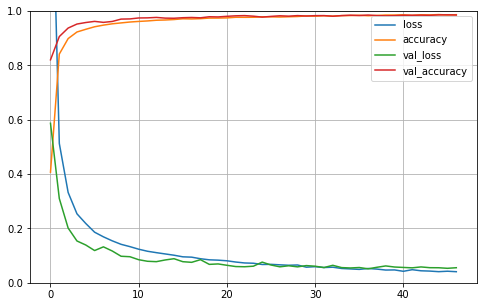

In [102]:
# visualise the training progression
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [114]:
with open('trainHistoryDict.pickle', 'wb') as file_pi:
    pickle.dump(model_history.history, file_pi)

- evidently, there is **very little overfitting** because the difference in train and validation accuracy is little

# Make Predictions

In [118]:
# the test set
total_test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# make class predictions
y_pred = model.predict_classes(X_test)
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [128]:
# create the output in required format
predictions_dict={'ImageId':range(1,28001),'Label':y_pred}
output_df = pd.DataFrame(predictions_dict).set_index('ImageId')

In [136]:
# set directory and output the predictions
os.chdir('C:\\Users\\tanch\\OneDrive\\Documents\\Kaggle\\digit-recognizer')
output_df.to_csv('CNN_predictions.csv')

# results

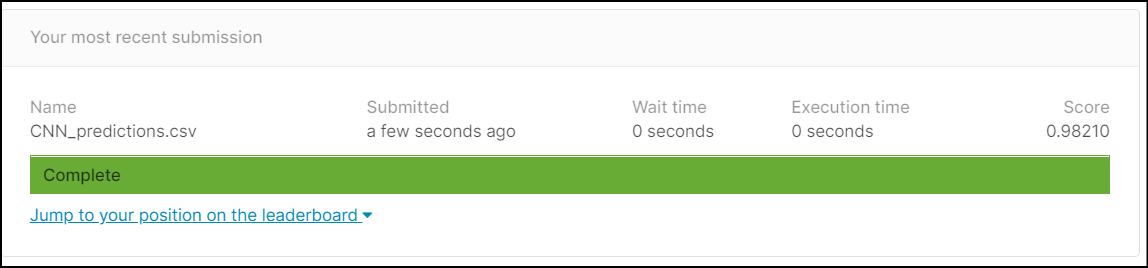

- not too bad for first try
- ranking is 1725 out of 2900+

## reload model and training history in future

In [137]:
# # delete model
# del model
# keras.backend.clear_session()

In [115]:
# to load the model and history again
# model = keras.models.load_model('CNN_early_stopping_model.h5')
# with open('trainHistoryDict.pickle', 'rb') as file_pi:
#     new_hist=pickle.load(file_pi, encoding='bytes')